In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

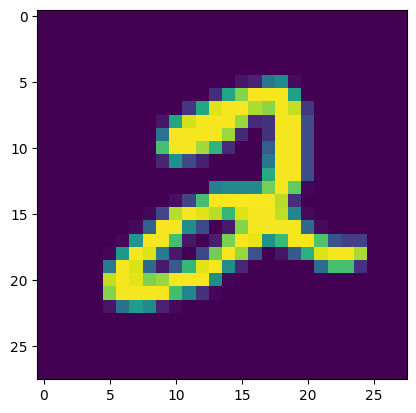

Label:  2


In [3]:
plt.imshow(x_train[5])
plt.show()
print('Label: ', y_train[5])

Sample Images:


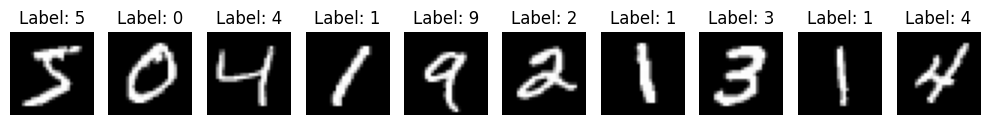

Class Distribution:


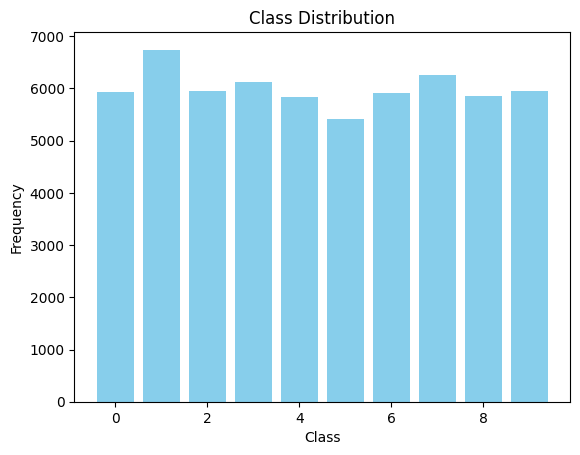

Pixel Intensity Distribution:


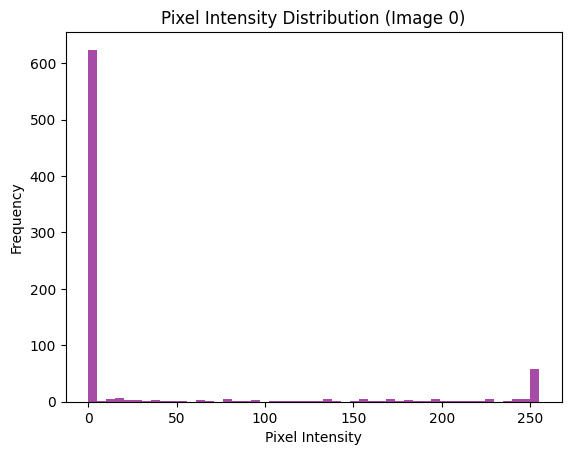

Mean Images for Each Digit:


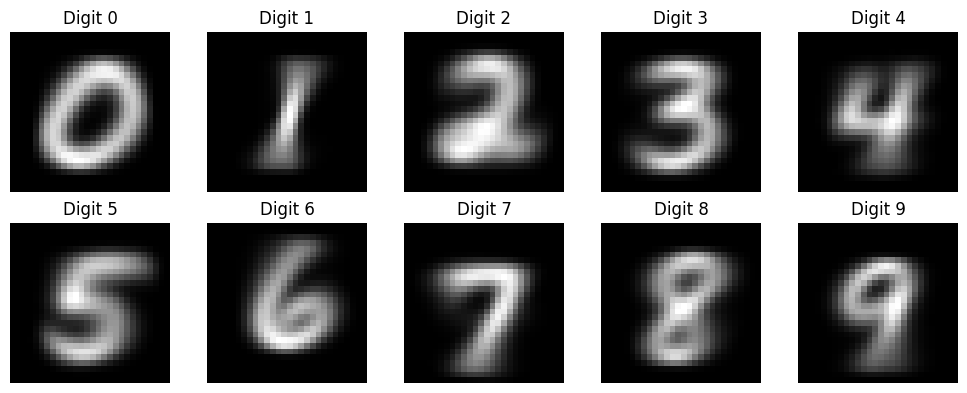

In [4]:
import numpy as np
# Visualize a few sample images with their labels
def visualize_samples(x, y, num_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the class distribution
def visualize_class_distribution(y):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts, color='skyblue')
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

# Visualize pixel intensity distribution of a single image
def visualize_pixel_intensity(image_index=0):
    plt.hist(x_train[image_index].flatten(), bins=50, color='purple', alpha=0.7)
    plt.title(f"Pixel Intensity Distribution (Image {image_index})")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Visualize mean images for each digit
def visualize_mean_images(x, y):
    mean_images = []
    for digit in range(10):
        mean_images.append(np.mean(x[y == digit], axis=0))

    plt.figure(figsize=(10, 4))
    for digit in range(10):
        plt.subplot(2, 5, digit + 1)
        plt.imshow(mean_images[digit], cmap='gray')
        plt.title(f"Digit {digit}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call visualization functions
print("Sample Images:")
visualize_samples(x_train, y_train)

print("Class Distribution:")
visualize_class_distribution(y_train)

print("Pixel Intensity Distribution:")
visualize_pixel_intensity()

# Convert y_train to numpy array for boolean indexing in mean images
y_train = np.array(y_train)
print("Mean Images for Each Digit:")
visualize_mean_images(x_train, y_train)


In [5]:
num_pixels = x_train.shape[1] * x_train.shape[2]
print (x_train.shape)
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

(60000, 28, 28)


In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [10]:
x_train,_,y_train,_=train_test_split(x_train,y_train, test_size = 0.67, random_state = 7)

In [16]:
from keras.layers import Activation
from keras import optimizers
def baseline_model():
    model = Sequential()
    model.add(Dense(50,input_dim=num_pixels, activation='sigmoid'))
    model.add(Dense(50,activation='sigmoid'))
    model.add(Dense(50,activation='sigmoid'))
    model.add(Dense(50,activation='sigmoid'))
    model.add(Dense(10,activation='softmax'))
    sgd = optimizers.SGD(learning_rate=0.001)
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [17]:
model = baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                39250     
                                                                 
 dense_11 (Dense)            (None, 50)                2550      
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
Total params: 47410 (185.20 KB)
Trainable params: 47410 (185.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs=100, batch_size=256, verbose=0)

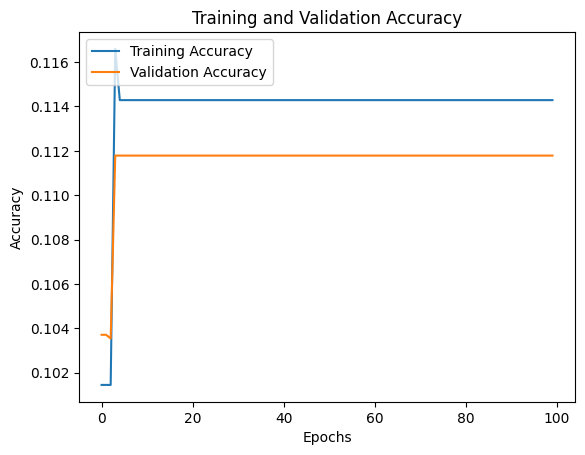

In [19]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [20]:
results = model.evaluate(x_test,y_test)
print('Test accuracy: ',results[1])

313/313 [==============================] - 1s 3ms/step - loss: 2.2991 - accuracy: 0.1135
Test accuracy:  0.11349999904632568


In [21]:
def mlp_model():
    model = Sequential()
    model.add(Dense(50,input_dim=num_pixels, kernel_initializer='he_normal', activation='sigmoid'))
    model.add(Dense(50,activation='sigmoid'))
    model.add(Dense(50,activation='sigmoid'))
    model.add(Dense(50,activation='sigmoid'))
    model.add(Dense(10,activation='softmax'))
    sgd = optimizers.SGD(learning_rate=0.001)
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [25]:
model1 = mlp_model()
h1 = model1.fit(x_train,y_train,validation_split = 0.3, epochs = 100, verbose = 0)

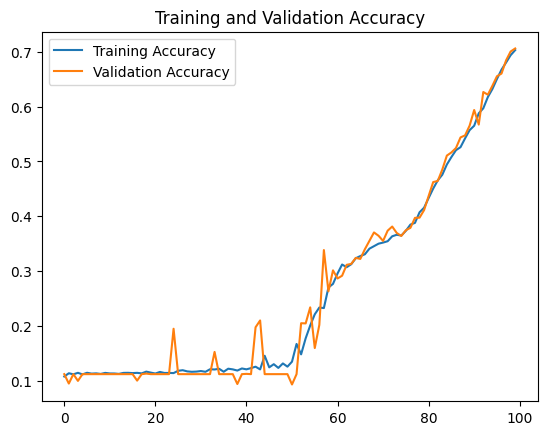

In [26]:
plt.plot(h1.history['accuracy'], label='Training Accuracy')
plt.plot(h1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.show()

In [27]:
r2= model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9915 - accuracy: 0.7017


In [28]:
print('Test accuracy: ', r2[1])

Test accuracy:  0.70169997215271


In [29]:
def mlp_model2():
    model = Sequential()
    model.add(Dense(50,input_dim=num_pixels, activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(10,activation='relu'))
    sgd = optimizers.SGD(learning_rate=0.001)
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [30]:
model2 = mlp_model2()
h2 = model2.fit(x_train,y_train,validation_split = 0.3, epochs = 100, verbose = 0)

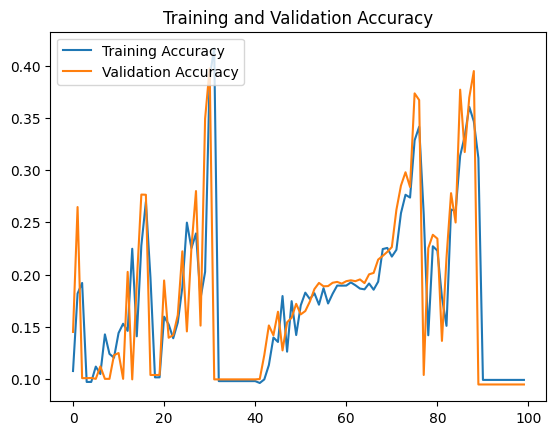

In [31]:
plt.plot(h2.history['accuracy'], label='Training Accuracy')
plt.plot(h2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')
plt.show()

In [32]:
r3= model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9915 - accuracy: 0.7017


In [33]:
print('Test accuracy: ', r3[1])

Test accuracy:  0.70169997215271
